Esercizio finale 2

L'obiettivo di questo esercizio è generare un set di dati di autogenerati
utilizzando le Lib., analizzarli con pandas e visualizzare i risultati
usando Matplotlib. Gli studenti dovranno eseguire le seguenti operazioni:



- Generazione dei Dati: Utilizzare NumPy per generare una serie temporale
di 365 giorni di dati, simulando il numero di visitatori giornalieri in
un ospedale. Assumere che il numero medio di visitatori sia 1200 con una
deviazione standard di 900. Inoltre, aggiungere un trend decrescente nel
tempo per simulare l'aumento della popolarità del parco.
- Creazione del DataFrame: Creare un DataFrame pandas con le date come
indice e il numero di visitatori come colonna e una collonna casuale
della patologia scelta fra 3(ossa, cuore, testa ).
- Analisi dei Dati: Calcolare il numero medio di visitatori per mese e la
deviazione standard e quale patologia è più e quale meno trovata. 
Visualizzazione dei Dati:
    - Creare un grafico a linee del numero di visitatori giornalieri.
    - Aggiungere al grafico la media mobile a 7 giorni per mostrare la
tendenza settimanale.
    - Creare un secondo grafico che mostri la media mensile dei visitatori.
    - creare un grafico che mostri la divisione fra le 3 patologie 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Generazione dei Dati
np.random.seed(42)  # Per riproducibilità dei risultati

# Parametri
num_giorni = 365  
media_visite = 1200
deviazione_visite = 900

# Trend decrescente (i visitatori diminuiscono con il tempo)
trend_decrescente = np.linspace(0, 500, num_giorni)

# Generazione dei visitatori giornalieri con deviazione casuale
visitatori = np.random.normal(media_visite, deviazione_visite, num_giorni)

# Aggiunta del trend decrescente
visitatori_con_trend = visitatori - trend_decrescente

# Assicurarsi che il numero di visitatori non sia negativo
visitatori_con_trend = np.maximum(visitatori_con_trend, 0)






In [24]:
# 2. Creazione del DataFrame
# Generazione delle date tramite NumPy (da '2024-01-01' in poi)
data_inizio = np.datetime64('2024-01-01')
data = data_inizio + np.arange(num_giorni)

print ("print di prova per visualizzare le date\n")
print('Data:', data) #print di prova per visualizzare le date

# Creazione della colonna per la patologia casuale
patologie = np.random.choice(['ossa', 'cuore', 'testa'], size=num_giorni)

# Creazione del DataFrame
df = pd.DataFrame({
    'Data': data,
    'Visitatori': visitatori_con_trend,
    'Patologia': patologie
})

df.set_index('Data', inplace=True)
print("prime 5 righe del Dataframe generato",display(df.head())) # print solo le prime 5 righe
print("ultime 5 righe del Dataframe generato", display(df.tail())) # print solo le ultime 5 righe



print di prova per visualizzare le date

Data: ['2024-01-01' '2024-01-02' '2024-01-03' '2024-01-04' '2024-01-05'
 '2024-01-06' '2024-01-07' '2024-01-08' '2024-01-09' '2024-01-10'
 '2024-01-11' '2024-01-12' '2024-01-13' '2024-01-14' '2024-01-15'
 '2024-01-16' '2024-01-17' '2024-01-18' '2024-01-19' '2024-01-20'
 '2024-01-21' '2024-01-22' '2024-01-23' '2024-01-24' '2024-01-25'
 '2024-01-26' '2024-01-27' '2024-01-28' '2024-01-29' '2024-01-30'
 '2024-01-31' '2024-02-01' '2024-02-02' '2024-02-03' '2024-02-04'
 '2024-02-05' '2024-02-06' '2024-02-07' '2024-02-08' '2024-02-09'
 '2024-02-10' '2024-02-11' '2024-02-12' '2024-02-13' '2024-02-14'
 '2024-02-15' '2024-02-16' '2024-02-17' '2024-02-18' '2024-02-19'
 '2024-02-20' '2024-02-21' '2024-02-22' '2024-02-23' '2024-02-24'
 '2024-02-25' '2024-02-26' '2024-02-27' '2024-02-28' '2024-02-29'
 '2024-03-01' '2024-03-02' '2024-03-03' '2024-03-04' '2024-03-05'
 '2024-03-06' '2024-03-07' '2024-03-08' '2024-03-09' '2024-03-10'
 '2024-03-11' '2024-03-12' '2

,Visitatori,Patologia
Data,,
2024-01-01,1647.042738,cuore
2024-01-02,1074.188503,ossa
2024-01-03,1780.172432,cuore
2024-01-04,2566.605992,cuore
2024-01-05,983.767457,ossa


prime 5 righe del Dataframe generato None


,Visitatori,Patologia
Data,,
2024-12-26,1172.906368,testa
2024-12-27,2083.585901,ossa
2024-12-28,604.863119,testa
2024-12-29,1062.914176,testa
2024-12-30,1321.129593,ossa


ultime 5 righe del Dataframe generato None


In [25]:
# 3. Analisi dei Dati
# Calcolare il numero medio di visitatori per mese
df['Mese'] = df.index.month
media_mensile = df.groupby('Mese')['Visitatori'].mean()
deviazione_mensile = df.groupby('Mese')['Visitatori'].std()
display("Media Mensile:", media_mensile)
display("Deviazione Standard Mensile:", deviazione_mensile)
# Calcolare quale patologia è più e meno trovata
patologia_counts = df['Patologia'].value_counts()
display("Conteggio Patologie:", patologia_counts)

'Media Mensile:'

Mese
1     1034.266670
2     1089.131467
3     1174.139509
4     1095.986978
5      971.602314
6     1200.319767
7     1104.200410
8      941.334588
9      883.143273
10     902.900432
11    1018.716579
12     686.511770
Name: Visitatori, dtype: float64

'Deviazione Standard Mensile:'

Mese
1     744.833373
2     772.119047
3     743.212772
4     759.221673
5     837.543800
6     869.025673
7     890.246654
8     784.998643
9     881.232566
10    677.567102
11    681.235900
12    578.092989
Name: Visitatori, dtype: float64

'Conteggio Patologie:'

Patologia
cuore    126
ossa     124
testa    115
Name: count, dtype: int64

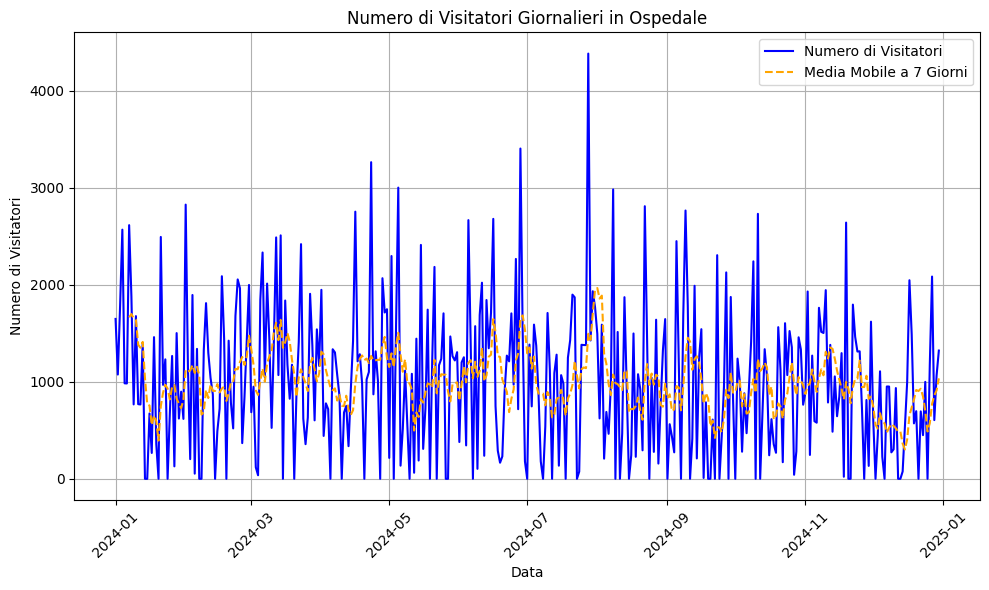

In [ ]:
# 4. Visualizzazione dei Dati
# a. Grafico a linee del numero di visitatori giornalieri
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Visitatori'], label='Numero di Visitatori', color='b')
plt.title('Numero di Visitatori Giornalieri in Ospedale')
plt.xlabel('Data')
plt.ylabel('Numero di Visitatori')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
# b. Aggiungere la media mobile a 7 giorni
media_mobile = df['Visitatori'].rolling(window=7).mean()
plt.plot(df.index, media_mobile, label='Media Mobile a 7 Giorni', color='orange', linestyle='--')
plt.legend()

plt.show() 

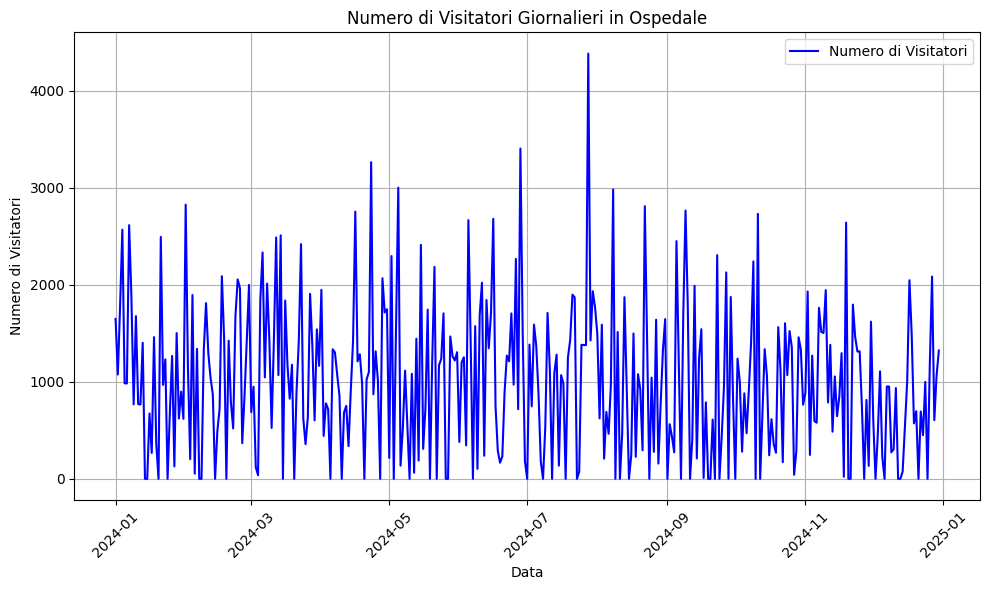

In [34]:
# 4. Visualizzazione dei Dati
# a. Grafico a linee del numero di visitatori giornalieri
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Visitatori'], label='Numero di Visitatori', color='b')
plt.title('Numero di Visitatori Giornalieri in Ospedale')
plt.xlabel('Data')
plt.ylabel('Numero di Visitatori')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

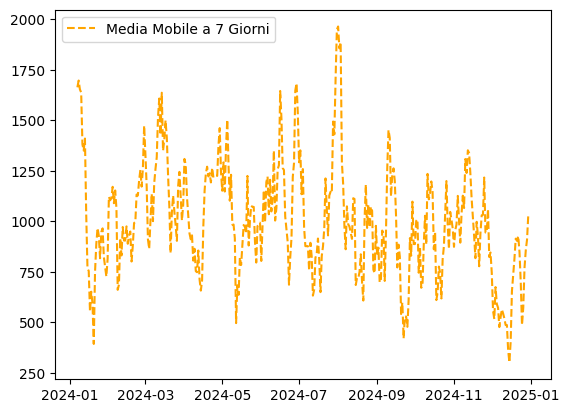

In [28]:
# b. Aggiungere la media mobile a 7 giorni
media_mobile = df['Visitatori'].rolling(window=7).mean()
plt.plot(df.index, media_mobile, label='Media Mobile a 7 Giorni', color='orange', linestyle='--')
plt.legend()

plt.show() 

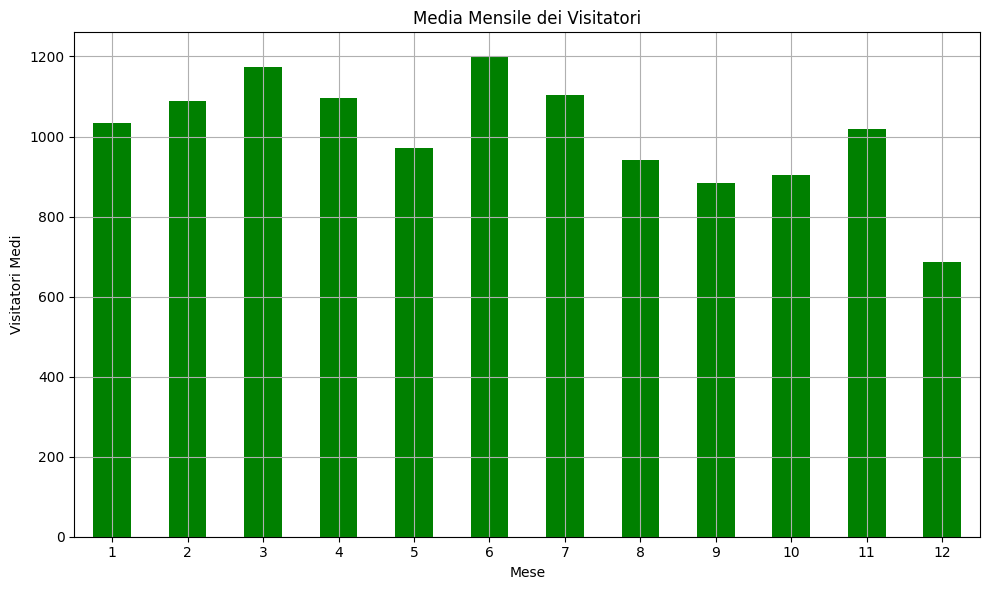

In [29]:
# c. Grafico della media mensile dei visitatori
plt.figure(figsize=(10, 6))
media_mensile.plot(kind='bar', color='green')
plt.title('Media Mensile dei Visitatori')
plt.xlabel('Mese')
plt.ylabel('Visitatori Medi')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

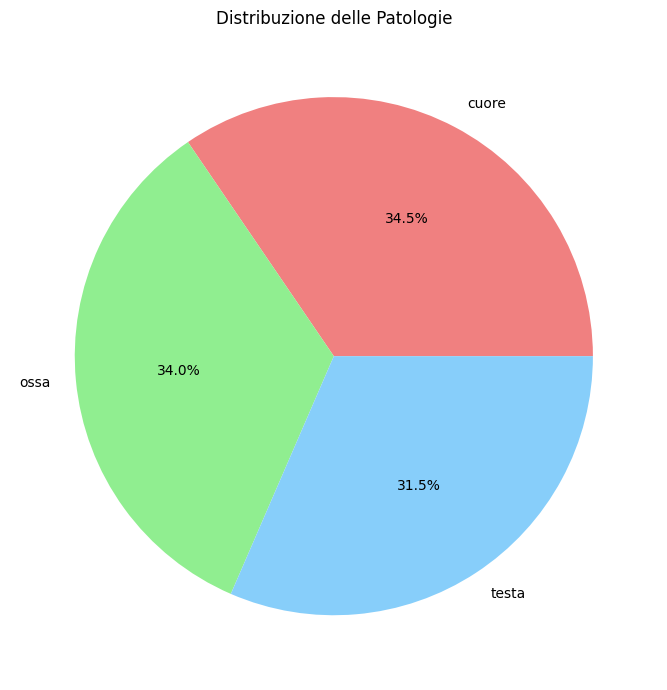

In [30]:
# d. Grafico a torta della distribuzione delle patologie
plt.figure(figsize=(7, 7))
patologia_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Distribuzione delle Patologie')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [32]:
# Output dell'analisi
print("Media dei visitatori per mese:")
print(media_mensile)
print("\nDeviazione standard dei visitatori per mese:")
print(deviazione_mensile)
print("\nDistribuzione delle patologie:")
print(patologia_counts)

Media dei visitatori per mese:
Mese
1     1034.266670
2     1089.131467
3     1174.139509
4     1095.986978
5      971.602314
6     1200.319767
7     1104.200410
8      941.334588
9      883.143273
10     902.900432
11    1018.716579
12     686.511770
Name: Visitatori, dtype: float64

Deviazione standard dei visitatori per mese:
Mese
1     744.833373
2     772.119047
3     743.212772
4     759.221673
5     837.543800
6     869.025673
7     890.246654
8     784.998643
9     881.232566
10    677.567102
11    681.235900
12    578.092989
Name: Visitatori, dtype: float64

Distribuzione delle patologie:
Patologia
cuore    126
ossa     124
testa    115
Name: count, dtype: int64
